In [ ]:
import pandas as pd
from implicit.als import AlternatingLeastSquares

from dataset import Dataset
from model_selection import GridSearchCV
from model_wrapper import ModelWrapper

import matplotlib.pyplot as plt

In [ ]:
dataset = Dataset.from_csv("C:/Users/TS/PycharmProjects/DS1-RecommendationSystems/data.csv",
                           user="user", item="subreddit", rating='count')

Loading csv.
Creating pivot.


In [ ]:
model = AlternatingLeastSquares

parameter = dict(iterations=[1],
                 factors=[60],
                 alpha=[1, 10, 40],
                 regularization=[0.01],
                 )
grid = GridSearchCV(algo=model,
                    param_grid=parameter,
                    cv=5,  # Number of folds in cross validation
                    eval_k=10,  # Number of Top items to check in validation
                    metrics=['map', 'precision']  # the metrics to use
                    )
print("Number of parameters combinations in grid:", len(grid))

Number of parameters combinations in grid: 3


In [ ]:
grid.fit(dataset.item_user)
grid.get_result(show=False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'param_set_0': {'params': {'alpha': 1,
   'factors': 60,
   'iterations': 1,
   'regularization': 0.01},
  'Fold 0': {'map': 0.03997459776922825, 'precision': 0.10073372341413578},
  'Fold 1': {'map': 0.042903860420799834, 'precision': 0.10724621514931801},
  'Fold 2': {'map': 0.04155826658058346, 'precision': 0.10318878342328928},
  'Fold 3': {'map': 0.04277152578883808, 'precision': 0.10554942260701305},
  'Fold 4': {'map': 0.043060378873161595, 'precision': 0.10593557367269835},
  'mean': {'map': 0.042053725886522245, 'precision': 0.10453074365329089},
  'std': {'map': 0.001167867228207876, 'precision': 0.002306653835987537}},
 'param_set_1': {'params': {'alpha': 10,
   'factors': 60,
   'iterations': 1,
   'regularization': 0.01},
  'Fold 0': {'map': 0.02062240249407631, 'precision': 0.06176898548032569},
  'Fold 1': {'map': 0.043486721310418405, 'precision': 0.10744452087477613},
  'Fold 2': {'map': 0.042826266930856574, 'precision': 0.10392083876170978},
  'Fold 3': {'map': 0.04

In [ ]:
inf = grid.get_result(show=False, filter_metric='map')
df = pd.DataFrame(inf)

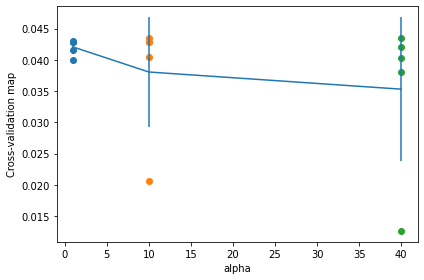

In [ ]:
metric = "map"
parameter = "alpha"
df = pd.DataFrame(grid.get_result(show=False, filter_metric=metric))
for i, k in enumerate(df[parameter]):
    plt.scatter([k] * grid.cv.n_splits, df[[f'Fold {i}' for i in range(grid.cv.n_splits)]].iloc[i])

plt.errorbar(df[parameter], df['mean'], yerr=df['std'])
plt.xlabel(parameter)
plt.ylabel(f'Cross-validation {metric}')
plt.tight_layout()
# plt.savefig(f"cv_{parameter}.png", dpi=400)
plt.show()

In [8]:
best_model = ModelWrapper(dataset, **grid.get_best()['map'][1])
best_model.fit()

  0%|          | 0/1 [00:00<?, ?it/s]

(23581, 60) (2483, 60)


In [ ]:
reddit = "nba"
best_model.similar_items(reddit, N=10, show=True)

In [ ]:
user = "IncognitoCumShot"  # -ah IncognitoCumShot
best_model.recommend(user, N=10, show=True)